# 線形モデル

In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.最小二乗法
実測値と予測値の二乗誤差が最小になるようなパラメータをもとめる

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
print('X shape:{}'.format(X.shape))
print('y shape:{}'.format(y.shape))

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)

X shape:(60, 1)
y shape:(60,)


In [12]:
print(f'lr.coef_:{lr.coef_}')
print(f'lr.intercept_:{lr.intercept_}')

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [17]:
print('Training set score: {:,.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


R^2が0.67というのは性能が良くないが、訓練とテストで値が近いので、過剰適合ではないだろう。つまり適合不足。
一次元のデータではモデルが単純なので過剰適合の危険は少ない。  
しかし、**多次元では線形モデルは過剰適合になる危険性が高まる**  
これを105の特徴量と506のサンプルをもつデータセットで検証してみる

In [19]:
X, y = mglearn.datasets.load_extended_boston()

print('X shape:{}'.format(X.shape))
print('y shape:{}'.format(y.shape))
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)

X shape:(506, 104)
y shape:(506,)


In [20]:
lr = LinearRegression().fit(X_train,y_train)
print('Training set score: {:,.2f}'.format(lr.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


訓練データに対してテストデータの精度が非常に悪い。明らかに過剰適合である。これを改良するためには**リッジ回帰**を使用する

### 1.1リッジ回帰
直感的には、予測をうまく行いつつ個々の特徴量が出力に与える影響を小さくする。パラメータに制約を加えて、訓練データに適合しすぎないようにして汎化性能の向上を目指す  
数学的には制約項を加えて、その条件下でラグランジュの未定乗数法を解くこと
*****
参考
- https://www.iwanttobeacat.com/entry/2018/02/02/012002

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print('Training set score: {:,.2f}'.format(ridge.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


通常の線形回帰に比べて、訓練データに対する適合は低く、テストデータに対する適合が高くなった。これは期待する結果の通りである。  
制約のパラメーターは通常は1.0であるが、これは訓練データとテストデータの間でトレードオフの関係になる。  
alphaを増やすと、訓練データの性能が低下するが、汎化性能はあがるかもしれない。

In [25]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('Training set score: {:,.2f}'.format(ridge10.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print('Training set score: {:,.2f}'.format(ridge01.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


今回のデータではalphaは0.1ぐらいか丁度良いかもしれない。このチューニングは別の章で詳しく見る。

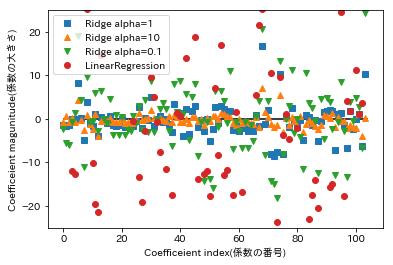

In [32]:
plt.plot(ridge.coef_, 's',label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^',label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o',label='LinearRegression')
plt.xlabel('Coefficeient index(係数の番号)')
plt.ylabel('Coefficeient magunitude(係数の大きさ)')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

alpha=10ではほとんどの係数が-3から3の間に入っており、alphaが小さいほど、この間隔が大きくなっていることが分かる。  
つまり訓練データに対して最小二乗誤差を小さくするために過剰適合することになる

今度はalphaを固定して訓練データのサンプル数を変えてみる

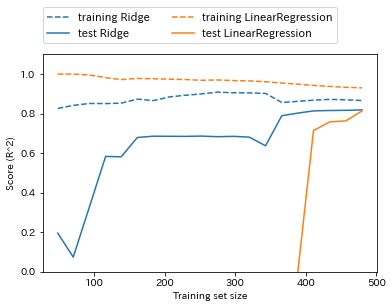

In [34]:
mglearn.plots.plot_ridge_n_samples()

サンプル数が少ないと特に400以下の場合では、リッジ回帰のほうが通常の線形回帰に比べて汎化性能が良い  
サンプル数が増えると双方の汎化性能は上昇し、どちらもよい結果となる  
つまりサンプル数が多いと**正則化はあまり重要ではなくなる**  
直感的に考えるとデータ数が多いと訓練データはどんな入力に対しても説得力が増すからだろう

### 1.2.ロッソ回帰
リッジ回帰と同様に係数に対して制約をかけるが、Lasso回帰の場合においてはいくつかの係数が完全に0になる。  
これはいくつかの特徴量を完全に無視しているということになる。つまり自動的に特徴量を選択している。
特徴量が減れば、モデルがシンプルになり、なにが重要であるかが解釈しやすくなる

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print('Training set score: {:,.2f}'.format(lasso.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(lasso.score(X_test,y_test)))
print('Number of feature used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of feature used: 4


105ある特徴量に対して4つの特徴量しか使っておらず性能が悪い。  
リッジ回帰同様に正則化のパラメータalphaを調整すること特徴量の数がどう変化するか検証する

In [38]:
#最大繰り返し数をデフォルトから増やさないと警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print('Training set score: {:,.2f}'.format(lasso001.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(lasso001.score(X_test,y_test)))
print('Number of feature used: {}'.format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of feature used: 33


リッジ回帰と同程度の性能だが、**特徴量は33しか使っていないため解釈がより簡単になっている**  
リッジ回帰同様にalphaの値を小さくすると正則化の効果は薄れ、過剰適合する可能性が高まる

In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print('Training set score: {:,.2f}'.format(lasso00001.score(X_train,y_train)))
print('Test set score: {:,.2f}'.format(lasso00001.score(X_test,y_test)))
print('Number of feature used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of feature used: 94


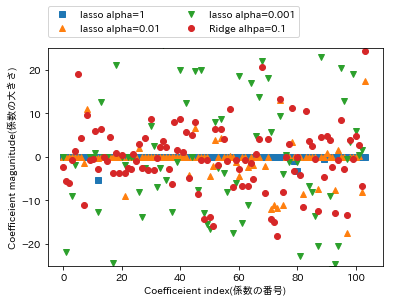

In [42]:
plt.plot(lasso.coef_, 's',label='lasso alpha=1')
plt.plot(lasso001.coef_, '^',label='lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v',label='lasso alpha=0.001')

plt.plot(ridge01.coef_, 'o',label='Ridge alhpa=0.1')
plt.xlabel('Coefficeient index(係数の番号)')
plt.ylabel('Coefficeient magunitude(係数の大きさ)')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05))

alpha=0.1のときのリッジ回帰とalpha=0.01の時のラッソ回帰は同程度の汎化性能を示したが、ラッソ回帰ではいくつかの特徴量が0になっている

##  まとめ
- まずはリッジ回帰を試すのがよい。そのうち重要なものがわずかしかないと予測されるならラッソ回帰を選ぶのがよいだろう。同様に解釈しやすいモデルが欲しい場合はラッソ回帰がよいかもしれない
- LassoとRidgeの両方のペナルティを含めたElasticNetも存在するが、ハイパーパラメーターは2つ選択しなければならない